In [36]:
import numpy as np
import pandas as pd
from datetime import datetime
import warnings
warnings.filterwarnings(action='ignore') # 경고 무시

In [24]:
# 시그모이드 함수
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [25]:
# 손실 함수 크로스 엔트로피 구현
def loss_func(x, t):
  delta = 1e-7 # log 무한대 발산 방지

  z = np.dot(x, W) + b
  y = sigmoid(z)
  # cross-entropy

  return -np.sum(t * np.log(y + delta) + (1 - t) * np.log((1 - y) + delta))

In [26]:
# 예측 함수
def predict(test_data):
  z = np.dot(test_data, W) + b
  y = sigmoid(z)

  if y >= 0.5:
    result = 1 # pass
  else:
    result = 0 # fail
  
  return y, result

In [27]:
# 수치미분 함수(
def numerical_derivative(f, x): 
  delta_x = 1e-4 # 0.0001
  grad = np.zeros_like(x) #수치미분된 값 저장할 ndarray로 x와 같은 크기의 0으로 된 배열 생성

  it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])

  while not it.finished:
    idx = it.multi_index
    tmp_val = x[idx]
    x[idx] = float(tmp_val) + delta_x
    fx1 = f(x) # f(x+delta_x)

    x[idx] = float(tmp_val) - delta_x
    fx2 = f(x) # f(x-delta_x)
    grad[idx] = (fx1 - fx2) / (2*delta_x)

    x[idx] = tmp_val
    it.iternext() # 다음 인덱스로 이동

  return grad

In [28]:
x_data = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20]).reshape(10, 1)
t_data = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1]).reshape(10, 1)

W = np.random.rand(1, 1)
b = np.random.rand(1)

print("x_data.shape = ", x_data.shape, ", t_data.shape = ", t_data.shape)
print("W = ", W, ", W.shape = ", W.shape, ", b = ", b, ", b.shape = ", b.shape)

x_data.shape =  (10, 1) , t_data.shape =  (10, 1)
W =  [[0.12373622]] , W.shape =  (1, 1) , b =  [0.04939123] , b.shape =  (1,)


In [29]:
# 수치미분을 이용한 로지스틱 회귀(Logistic Regression) 시스템 학습과정
learning_rate = 1e-2

f = lambda x : loss_func(x_data, t_data)

print("Initial loss value = ", loss_func(x_data, t_data) )

start_time = datetime.now()

for step in range(50001):
 W -= learning_rate * numerical_derivative(f, W)
 b -= learning_rate * numerical_derivative(f, b)
 
 if (step % 5000 == 0):
  print("step = ", step, "loss value = ", loss_func(x_data, t_data))
# Initial loss value =  11.44715635346739
# step =  0 loss value =  16.588751290394047
# step =  5000 loss value =  0.8459004198991034
# step =  10000 loss value =  0.6212592764389302
# step =  15000 loss value =  0.5096560302109602
# step =  20000 loss value =  0.43789620052684075
# step =  25000 loss value =  0.38623438294350376
# step =  30000 loss value =  0.34659472979715356
# step =  35000 loss value =  0.3149065382818373
# step =  40000 loss value =  0.2888369476326878
# step =  45000 loss value =  0.26692738740234295
# step =  50000 loss value =  0.24820674749383093

Initial loss value =  8.076004091061382
step =  0 loss value =  10.824021056677875
step =  5000 loss value =  0.8440058697658721
step =  10000 loss value =  0.6204923445507673
step =  15000 loss value =  0.509200083621903
step =  20000 loss value =  0.43758113227663237
step =  25000 loss value =  0.385998623812368
step =  30000 loss value =  0.34640943084221126
step =  35000 loss value =  0.31475595270153417
step =  40000 loss value =  0.2887115661838355
step =  45000 loss value =  0.2668210409326574
step =  50000 loss value =  0.24811521464042455


In [30]:
test_data = np.array([3.0]) # 3 시간에 대한 미래 값 예측
(real_val_1, logical_val_1) = predict(test_data)
print("시그모이드 결과 =>", real_val_1, ", 로지스틱회귀 결과 =>", logical_val_1)

test_data = np.array([17.0]) # 17 시간에 대한 미래 값 예측
(real_val_2, logical_val_2) = predict(test_data)
print("시그모이드 결과 =>", real_val_2, ", 로지스틱회귀 결과 =>", logical_val_2)

시그모이드 결과 => [1.41081396e-09] , 로지스틱회귀 결과 => 0
시그모이드 결과 => [0.9997458] , 로지스틱회귀 결과 => 1


In [31]:
# 유방암 데이터 사용
from sklearn.datasets import load_breast_cancer
import pandas as pd

dataset = load_breast_cancer()

train = pd.DataFrame(dataset.data, columns=dataset.feature_names)

target = pd.DataFrame(dataset.target, columns=['cancer'])

data = pd.concat([train, target], axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [31]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [28]:
train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [29]:
target

,cancer
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [32]:
# 학습용 데이터/검증용 데이터 생성
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['mean radius']], data[['cancer']], random_state=42)

print(X_train)
print('--------------------------')

print(X_test)
print('--------------------------')

     mean radius
287       12.890
512       13.400
402       12.960
446       17.750
210       20.580
..           ...
71         8.888
106       11.640
270       14.290
435       13.980
102       12.180

[426 rows x 1 columns]
--------------------------
     mean radius
204        12.47
70         18.94
131        15.46
431        12.40
540        11.54
..           ...
89         14.64
199        14.45
411        11.04
18         19.81
390        10.26

[143 rows x 1 columns]
--------------------------


# `MinMaxScaler`를 사용한 학습

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(solver='liblinear')
model.fit(X_train_scaled, y_train)

score = model.score(X_train_scaled, y_train)

score

0.852112676056338

# `StandardScaler`를 사용한 학습

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
scaler.fit(X_train)


X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(solver='liblinear')
model.fit(X_train_scaled, y_train)

score = model.score(X_train_scaled, y_train)

score

0.8708920187793427

In [19]:
# 모델 생성 및 학습
from sklearn.linear_model import LogisticRegression
# solver : 최적화에 사용할 알고리즘 설정

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

c:\Users\han12\OneDrive\Desktop\AIschool\Python\AI_Source\venv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

In [20]:
from sklearn.metrics import accuracy_score

pred = model.predict(X_test)
print('mean radius 만으로 예측한 결과 :', pred)
accuracy_score(y_test, pred)

mean radius 만으로 예측한 결과 : [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1]


0.916083916083916

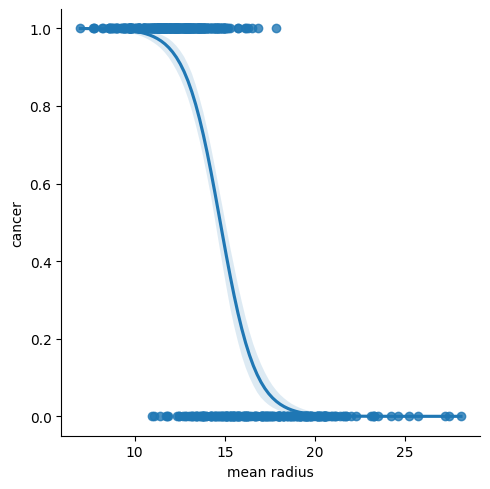

In [23]:
# 모델 그리기 : mean radius 피처가 타겟을 어떻게 분류했는지 확인
# pip install statsmodels : statsmodels 설치 확인
from seaborn import lmplot
import matplotlib.pyplot as plt

lmplot(x='mean radius', y='cancer', data=data, logistic=True)
plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, :'cancer'], data.loc[:, 'cancer'], random_state=42)

model.fit(X_train, y_train)

score = model.score(X_test, y_test)

print(f'전체 데이터로 예측한 결과 : {score}')

전체 데이터로 예측한 결과 : 1.0
